Eficiencia terminal por entidad federativa según nivel educativo, ciclos escolares seleccionados de 2000/2001 a 2023/2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_excel('Educacion_12.xlsx')
#df1.info()
#df1.head(10)

In [4]:
#El archivo tiene datos fuera de la tabla que nos interesa, asi que limpiamos todo menos la tabla
df1 = df1.iloc[4:104].reset_index(drop=True)
df1.columns = df1.iloc[0]  #asignamos el encabezado
df1 = df1.drop(0).reset_index(drop=True)
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x) #pasamos todo a minusculas
df1.columns = df1.columns.str.lower()
df1 = df1.apply(pd.to_numeric, errors='ignore') #cambiamos el tipo de dato de los numeros

C:\Users\roman\AppData\Local\Temp\ipykernel_17912\1317254074.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x) #pasamos todo a minusculas
C:\Users\roman\AppData\Local\Temp\ipykernel_17912\1317254074.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore') #cambiamos el tipo de dato de los numeros


In [5]:
#podemos ver que no hay datos faltantes y los tipos de datos son correctos
df1.info()
df1.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   entidad federativa  99 non-null     object 
 1   nivel educativo     99 non-null     object 
 2   2015/2016           99 non-null     float64
 3   2020/2021           99 non-null     float64
 4   2021/2022           99 non-null     float64
 5   2022/2023           99 non-null     float64
 6   2023/2024           99 non-null     float64
dtypes: float64(5), object(2)
memory usage: 5.5+ KB


,entidad federativa,nivel educativo,2015/2016,2020/2021,2021/2022,2022/2023,2023/2024
0,estados unidos mexicanos,primaria,98.3,96.7,96.1,97.7,97.1
1,estados unidos mexicanos,secundaria,87.7,91.0,91.0,89.0,90.8
2,estados unidos mexicanos,media superior,65.6,64.9,68.5,72.9,75.4
3,aguascalientes,primaria,99.5,100.2,98.3,99.1,98.7
4,aguascalientes,secundaria,83.1,91.1,89.9,85.7,85.2
...,...,...,...,...,...,...,...
94,yucatán,secundaria,82.1,93.8,92.4,91.4,90.4
95,yucatán,media superior,60.7,68.6,65.6,67.8,72.6
96,zacatecas,primaria,98.7,97.5,96.8,96.9,96.0
97,zacatecas,secundaria,81.5,87.1,87.4,83.5,84.9


# Hallazgos

Nivel educativo con mayor eficiencia terminal por estado y año:


,entidad federativa,Año,nivel educativo
3,aguascalientes,2015/2016,primaria
102,aguascalientes,2020/2021,primaria
201,aguascalientes,2021/2022,primaria
300,aguascalientes,2022/2023,primaria
399,aguascalientes,2023/2024,primaria
...,...,...,...
96,zacatecas,2015/2016,primaria
195,zacatecas,2020/2021,primaria
294,zacatecas,2021/2022,primaria
393,zacatecas,2022/2023,primaria


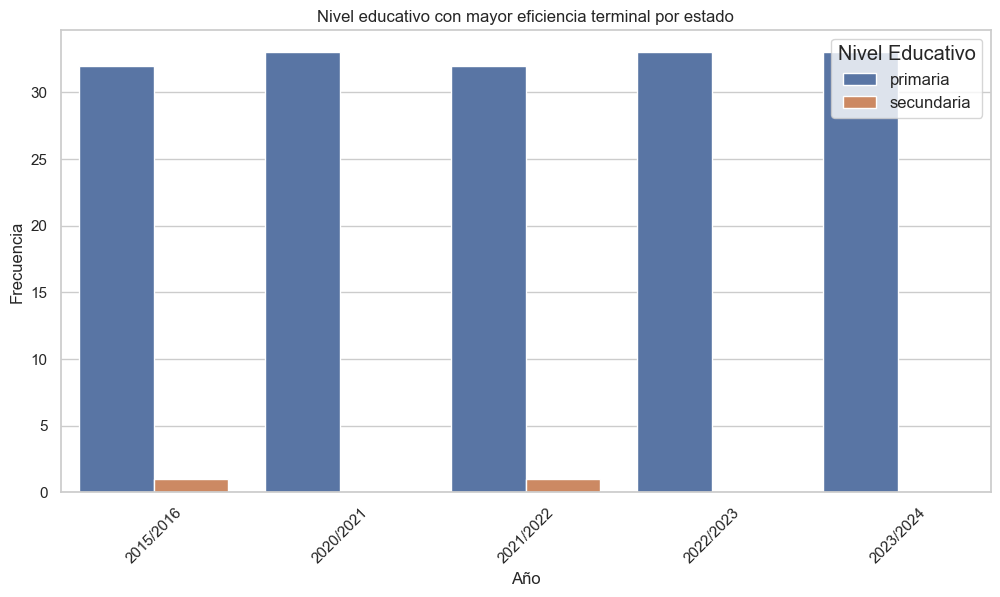

In [75]:
#Nivel educativo fue el mas alto a traves de los años por estado
df_melted = df1.melt(id_vars=['entidad federativa', 'nivel educativo'], var_name='Año', value_name='Eficiencia Terminal')
df_max_nivel = df_melted.loc[df_melted.groupby(['entidad federativa', 'Año'])['Eficiencia Terminal'].idxmax(), ['entidad federativa', 'Año', 'nivel educativo']]

print("Nivel educativo con mayor eficiencia terminal por estado y año:")
display(df_max_nivel)

# Graficar en histogramas
plt.figure(figsize=(12, 6))
sns.countplot(data=df_max_nivel, x='Año', hue='nivel educativo')
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Nivel educativo con mayor eficiencia terminal por estado")
plt.xticks(rotation=45)
plt.legend(title="Nivel Educativo", loc='upper right', fontsize='medium', title_fontsize='large')
plt.show()

Nivel educativo con mayor eficiencia terminal por estado y año:


,entidad federativa,Año,nivel educativo
5,aguascalientes,2015/2016,media superior
104,aguascalientes,2020/2021,media superior
203,aguascalientes,2021/2022,media superior
302,aguascalientes,2022/2023,media superior
401,aguascalientes,2023/2024,media superior
...,...,...,...
98,zacatecas,2015/2016,media superior
197,zacatecas,2020/2021,media superior
296,zacatecas,2021/2022,media superior
395,zacatecas,2022/2023,media superior


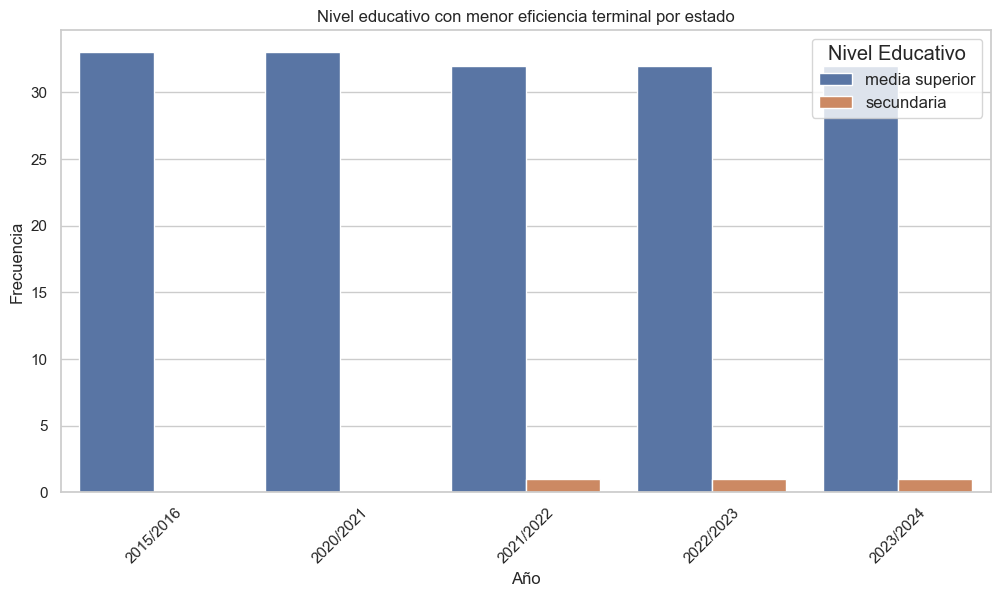

In [74]:
#Nivel educativo fue el mas bajo a traves de los años por estado
df_melted = df1.melt(id_vars=['entidad federativa', 'nivel educativo'], var_name='Año', value_name='Eficiencia Terminal')
df_max_nivel = df_melted.loc[df_melted.groupby(['entidad federativa', 'Año'])['Eficiencia Terminal'].idxmin(), ['entidad federativa', 'Año', 'nivel educativo']]

print("Nivel educativo con mayor eficiencia terminal por estado y año:")
display(df_max_nivel)

# Graficar en histogramas
plt.figure(figsize=(12, 6))
sns.countplot(data=df_max_nivel, x='Año', hue='nivel educativo')
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Nivel educativo con menor eficiencia terminal por estado")
plt.xticks(rotation=45)
plt.legend(title="Nivel Educativo", loc='upper right', fontsize='medium', title_fontsize='large')
plt.show()

In [15]:
#Promedio por nivel educativo y año
numeric_cols = df1.select_dtypes(include='number').columns
df1.groupby("nivel educativo")[numeric_cols].mean()

,2015/2016,2020/2021,2021/2022,2022/2023,2023/2024
nivel educativo,,,,,
media superior,65.754545,64.921212,67.324242,72.248485,75.024242
primaria,98.730303,97.454545,96.760606,98.457576,97.581818
secundaria,86.196970,90.951515,90.806061,88.554545,90.269697


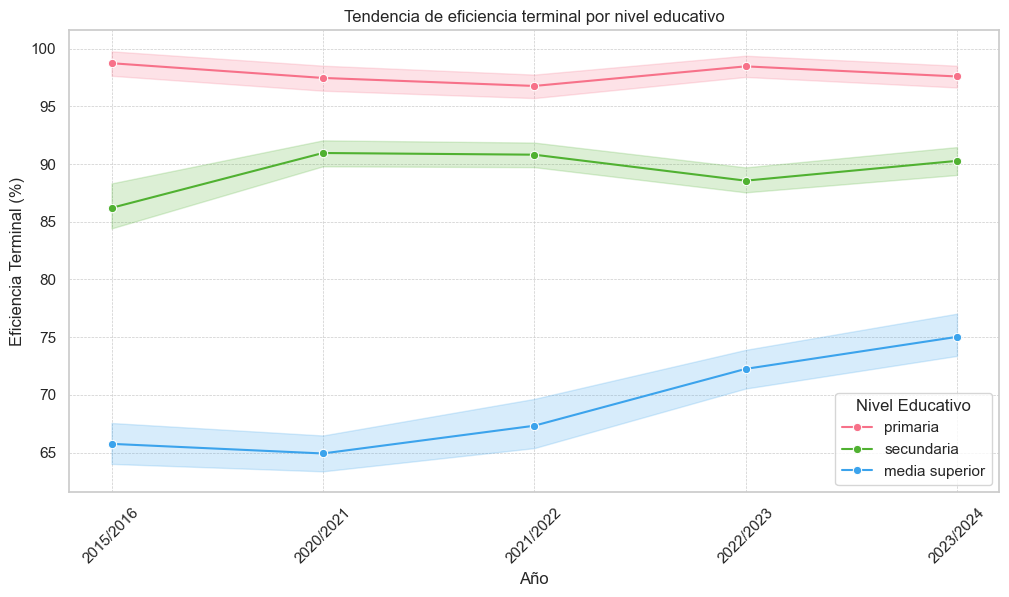

In [52]:
# Tendencia de eficiencia terminal por nivel educativo
df_melted = df1.melt(id_vars=['entidad federativa', 'nivel educativo'], var_name='Año', value_name='Eficiencia Terminal')

# Ajustar el estilo
theme_colors = sns.color_palette("husl", n_colors=len(df_melted['nivel educativo'].unique()))
sns.set(style="whitegrid")

# Graficar la tendencia con líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Año', y='Eficiencia Terminal', hue='nivel educativo', marker='o', palette=theme_colors)

plt.xlabel("Año")
plt.ylabel("Eficiencia Terminal (%)")
plt.title("Tendencia de eficiencia terminal por nivel educativo")
plt.legend(title="Nivel Educativo")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Estado con mayor eficiencia terminal por año disponible
df_long = df1.melt(id_vars=['entidad federativa', 'nivel educativo'], var_name='Año', value_name='Eficiencia Terminal')
df_nivel_anio = df_long.loc[df_long.groupby(['Año', 'nivel educativo'])['Eficiencia Terminal'].idxmax(), ['Año', 'nivel educativo', 'entidad federativa', 'Eficiencia Terminal']]
print("Estado con mayor eficiencia terminal por nivel educativo y año:")
print(df_nivel_anio)

Estado con mayor eficiencia terminal por nivel educativo y año:
           Año nivel educativo   entidad federativa  Eficiencia Terminal
44   2015/2016  media superior              jalisco                 77.5
18   2015/2016        primaria               colima                104.7
28   2015/2016      secundaria     ciudad de méxico                104.8
170  2020/2021  media superior         quintana roo                 76.2
165  2020/2021        primaria            querétaro                103.1
157  2020/2021      secundaria           nuevo león                 96.8
242  2021/2022  media superior              jalisco                 93.5
255  2021/2022        primaria           nuevo león                102.1
208  2021/2022      secundaria  baja california sur                 95.6
341  2022/2023  media superior              jalisco                 88.0
306  2022/2023        primaria  baja california sur                105.0
307  2022/2023      secundaria  baja california sur         

In [59]:
#Estado con menor eficiencia terminal por año disponible
df_long = df1.melt(id_vars=['entidad federativa', 'nivel educativo'], var_name='Año', value_name='Eficiencia Terminal')
df_nivel_anio = df_long.loc[df_long.groupby(['Año', 'nivel educativo'])['Eficiencia Terminal'].idxmin(), ['Año', 'nivel educativo', 'entidad federativa', 'Eficiencia Terminal']]
print("Estado con mayor eficiencia terminal por nivel educativo y año:")
print(df_nivel_anio)

Estado con mayor eficiencia terminal por nivel educativo y año:
           Año nivel educativo   entidad federativa  Eficiencia Terminal
29   2015/2016  media superior     ciudad de méxico                 54.6
60   2015/2016        primaria               oaxaca                 91.3
49   2015/2016      secundaria  michoacán de ocampo                 73.7
152  2020/2021  media superior              morelos                 55.3
147  2020/2021        primaria  michoacán de ocampo                 89.2
148  2020/2021      secundaria  michoacán de ocampo                 78.5
251  2021/2022  media superior              morelos                 60.5
246  2021/2022        primaria  michoacán de ocampo                 89.9
247  2021/2022      secundaria  michoacán de ocampo                 81.0
326  2022/2023  media superior     ciudad de méxico                 64.2
345  2022/2023        primaria  michoacán de ocampo                 92.2
346  2022/2023      secundaria  michoacán de ocampo         

C:\Users\roman\AppData\Local\Temp\ipykernel_14672\4233699324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfV['Variacion'] = df1['2023/2024'] - df1['2015/2016']


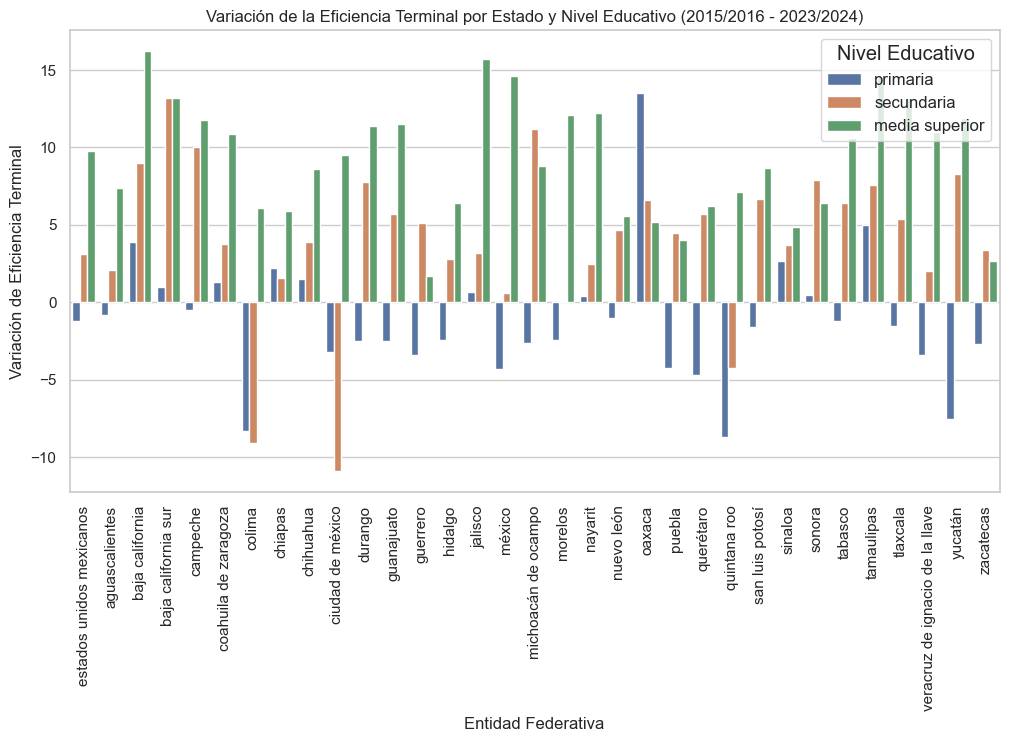

In [76]:
#Variación de eficiencia terminal entre 2015/2016 y 2023/2024
dfV = df1[["entidad federativa", "nivel educativo"]]
dfV['Variacion'] = df1['2023/2024'] - df1['2015/2016']
dfV

# Graficar la variación
plt.figure(figsize=(12, 6))
sns.barplot(data=dfV, x='entidad federativa', y='Variacion', hue='nivel educativo')
plt.xlabel("Entidad Federativa")
plt.ylabel("Variación de Eficiencia Terminal")
plt.title("Variación de la Eficiencia Terminal por Estado y Nivel Educativo (2015/2016 - 2023/2024)")
plt.xticks(rotation=90)
plt.legend(title="Nivel Educativo", loc='upper right', fontsize='medium', title_fontsize='large')
plt.show()

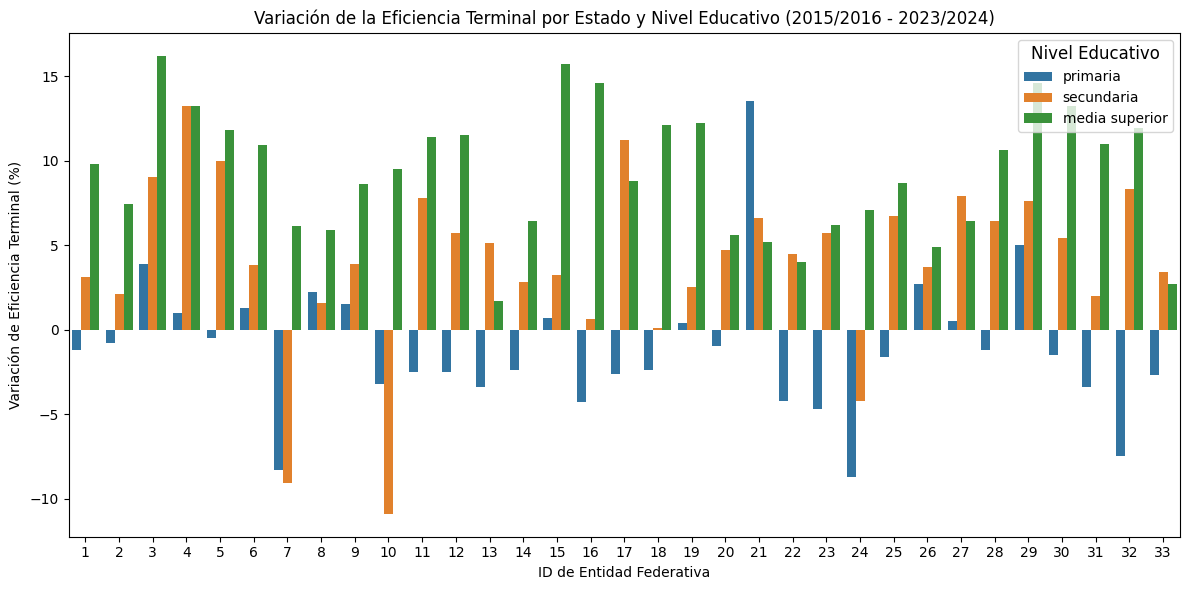

{'estados unidos mexicanos': 1,
 'aguascalientes': 2,
 'baja california': 3,
 'baja california sur': 4,
 'campeche': 5,
 'coahuila de zaragoza': 6,
 'colima': 7,
 'chiapas': 8,
 'chihuahua': 9,
 'ciudad de méxico': 10,
 'durango': 11,
 'guanajuato': 12,
 'guerrero': 13,
 'hidalgo': 14,
 'jalisco': 15,
 'méxico': 16,
 'michoacán de ocampo': 17,
 'morelos': 18,
 'nayarit': 19,
 'nuevo león': 20,
 'oaxaca': 21,
 'puebla': 22,
 'querétaro': 23,
 'quintana roo': 24,
 'san luis potosí': 25,
 'sinaloa': 26,
 'sonora': 27,
 'tabasco': 28,
 'tamaulipas': 29,
 'tlaxcala': 30,
 'veracruz de ignacio de la llave': 31,
 'yucatán': 32,
 'zacatecas': 33}

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame que estás usando
dfV = df1[["entidad federativa", "nivel educativo"]].copy()
dfV['Variacion'] = df1['2023/2024'] - df1['2015/2016']

# Crear un diccionario de mapeo de estado a número
estado_to_num = {estado: idx+1 for idx, estado in enumerate(dfV['entidad federativa'].unique())}

# Aplicar el mapeo a una nueva columna
dfV['estado_id'] = dfV['entidad federativa'].map(estado_to_num)

# Graficar usando los números
plt.figure(figsize=(12, 6))
sns.barplot(data=dfV, x='estado_id', y='Variacion', hue='nivel educativo', dodge=True)
plt.xlabel("ID de Entidad Federativa")
plt.ylabel("Variación de Eficiencia Terminal (%)")
plt.title("Variación de la Eficiencia Terminal por Estado y Nivel Educativo (2015/2016 - 2023/2024)")
plt.xticks(rotation=0)
plt.legend(title="Nivel Educativo", loc='upper right', fontsize='medium', title_fontsize='large')
plt.tight_layout()
plt.show()

# Mostrar el mapeo por si lo necesitas en una tabla aparte
estado_to_num

In [25]:
#Estados con disminución en eficiencia terminal - Se filtran los estados con variación negativa
print(dfV[dfV["Variacion"] < 0])

0                entidad federativa nivel educativo  Variacion
0          estados unidos mexicanos        primaria       -1.2
3                    aguascalientes        primaria       -0.8
12                         campeche        primaria       -0.5
18                           colima        primaria       -8.3
19                           colima      secundaria       -9.1
27                 ciudad de méxico        primaria       -3.2
28                 ciudad de méxico      secundaria      -10.9
30                          durango        primaria       -2.5
33                       guanajuato        primaria       -2.5
36                         guerrero        primaria       -3.4
39                          hidalgo        primaria       -2.4
45                           méxico        primaria       -4.3
48              michoacán de ocampo        primaria       -2.6
51                          morelos        primaria       -2.4
57                       nuevo león        primaria    

# PASAR A ARCHIVO

In [53]:
#Datos limpios
df1.to_excel('eficiencia_terminal_limpio.xlsx', index=False)

#Diccionario
dic_col = ['variables', 'tipo_dato', 'descripcion'] #Las columnas del diccionario
column_headers = list(df1.columns) #lista de las columnas de los datos
column_types = df1.dtypes.astype(str).tolist() #lista de los tipos de datos de las columnas
column_desc = ['Entidad federativa', 'Nivel educativo', 'Datos del plazo de tiempo entre 2015 y 2016', 'Datos del plazo de tiempo entre 2020 y 2021',
                'Datos del plazo de tiempo entre 2021 y 2022', 'Datos del plazo de tiempo entre 2022 y 2023',
                  'Datos del plazo de tiempo entre 2023 y 2024'] #Descripciones 

diccionario = pd.DataFrame({
    dic_col[0]: column_headers,
    dic_col[1]: column_types,
    dic_col[2]: column_desc
})
#diccionario.head(10)
df1.to_excel('eficiencia_terminal_dicc.xlsx', index=False)